# HARRIS CORNER DETECTION

Text(0.5, 1.0, 'HARRIS corner detected image')

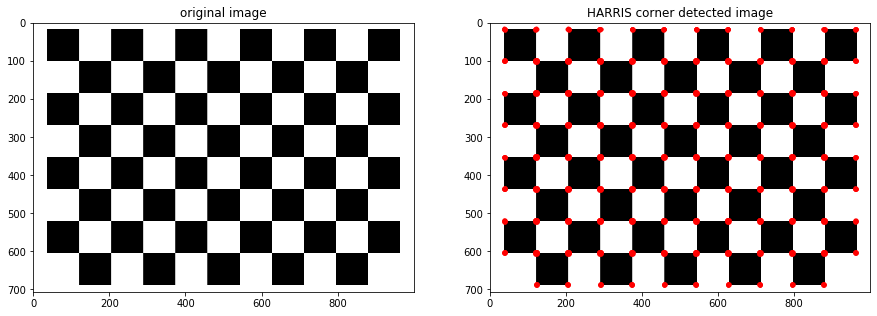

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2gray
#threshold=8000000000 #for Clipboard01.jpg
#threshold=8000000000
threshold=.1 #for Clipboard02.jpg
threshold1=.15


k=.05
x=np.linspace(-1,1,3)
dx,dy=np.meshgrid(x,x)
img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/a4-checkerboard.png')
# img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/Clipboard01.jpg',0)
#img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/Clipboard02.jpg')

img= rgb2gray(img)
img = img.astype(np.float32)
#plt.imshow(img,cmap='gray')
Ix = cv2.filter2D(img,-1,dx)
Iy = cv2.filter2D(img,-1,dy)
Ix2 = cv2.GaussianBlur(np.multiply(Ix,Ix), (15, 15), 1)
Iy2 = cv2.GaussianBlur(np.multiply(Iy,Iy), (15, 15), 1)
Ixy = cv2.GaussianBlur(np.multiply(Ix,Iy), (15, 15), 1)
ws=3
v=int((ws-1)/2)
px=[]
py=[]
qx=[]
qy=[]
for i in range (v,img.shape[0]-v):
    for j in range (v,img.shape[1]-v):
        a=(Ix2[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
        b=(Iy2[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
        c=(Ixy[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
        arr=np.array([[a,c],[c,b]])
        evl,evc=np.linalg.eigh(arr)
        R1=min(evl)
        R=((a*b)-(c*c))-k*((a+b)**2)
#         if R>=threshold:
#             px.append(j)
#             py.append(i)
        if R1>=threshold1:
            qx.append(j)
            qy.append(i)
#------------------------------------------------------------------------------------------------------------------
# img1=cv2.imread('C:/Users/Ankit/Downloads/a1.jpg')
# img1=rgb2gray(img1)
# img1=img1.reshape()
# img1 = img1.astype(np.float32)
# #plt.imshow(img,cmap='gray')
# Ix = cv2.filter2D(img1,-1,dx)
# Iy = cv2.filter2D(img1,-1,dy)
# Ix2 = cv2.GaussianBlur(np.multiply(Ix,Ix), (15, 15), 1)
# Iy2 = cv2.GaussianBlur(np.multiply(Iy,Iy), (15, 15), 1)
# Ixy = cv2.GaussianBlur(np.multiply(Ix,Iy), (15, 15), 1)
# ws=3
# v=int((ws-1)/2)
# px=[]
# py=[]
# qx1=[]
# qy1=[]
# for i in range (v,img1.shape[0]-v):
#     for j in range (v,img1.shape[1]-v):
#         a=(Ix2[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
#         b=(Iy2[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
#         c=(Ixy[i,j])#[i-v:i+v+1,j-v:j+v+1]).sum()
#         arr=np.array([[a,c],[c,b]])
#         evl,evc=np.linalg.eigh(arr)
#         R1=min(evl)
#         R=((a*b)-(c*c))-k*((a+b)**2)
# #         if R>=threshold:
# #             px.append(j)
# #             py.append(i)
#         if R1>=threshold1:
#             qx1.append(j)
#             qy1.append(i)







#-------------------------------------------------------------------------------------------------------------------
        
figure=plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.scatter(qx,qy,marker='.',color='r')#s=100,linewidths=.1,facecolors='none', edgecolors='r')
plt.title("HARRIS corner detected image")
# plt.subplot(1,3,3)
# plt.imshow(img,cmap='gray')
# plt.scatter(qx,qy,marker='.',color='r')#,s=100,linewidths=.1,facecolors='none', edgecolors='r')
# plt.title("Shi-Tomasi corner detected image")
